# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

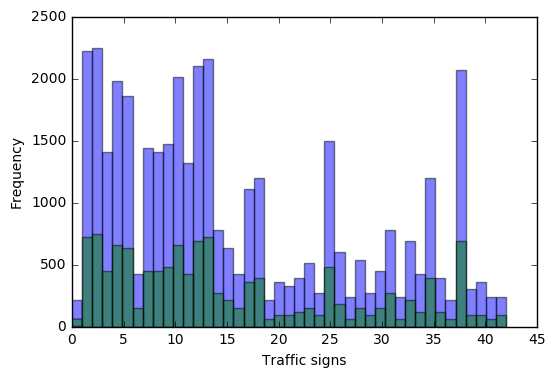

In [4]:
plt.hist(y_train,n_classes,alpha=0.5)
plt.hist(y_test,n_classes,alpha=0.5)
plt.xlabel("Traffic signs")
plt.ylabel("Frequency")
plt.show()  

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

Label is 12


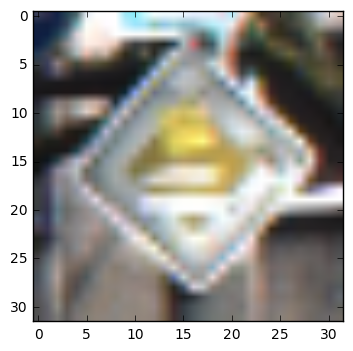

In [5]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
import random

ind = random.randint(0,n_train)
plt.imshow(X_train[ind])
print("Label is" , y_train[ind])


In [6]:
#suffle
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

In [7]:

#setup tensorflow

import tensorflow as tf
#import cv2


EPOCH=10
BATCH_SIZE=128

from sklearn.preprocessing import OneHotEncoder
from sklearn.cross_validation import train_test_split
import numpy as np
import pandas as pd
import cv2



/Users/sunilp/anaconda3/envs/CarND-Traffic-Sign-Classifier-Project/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
img_resize = 32
def OHE_labels(Y_tr,N_classes):
    OHC = OneHotEncoder()
    
    Y_ohc = OHC.fit(np.arange(N_classes).reshape(-1, 1))
    Y_labels = Y_ohc.transform(Y_tr.reshape(-1, 1)).toarray()
    return Y_labels

def pre_process_image(image):

    #image = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    #image = image[:,:,0]
    image[:,:,0] = cv2.equalizeHist(image[:,:,0])
    image[:,:,1] = cv2.equalizeHist(image[:,:,1])
    image[:,:,2] = cv2.equalizeHist(image[:,:,2])
    image = image/255.-.5
    #image = cv2.resize(image, (img_resize,img_resize),interpolation = cv2.INTER_CUBIC)
    
    return image

def transform_image(image,ang_range,shear_range,trans_range):

    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = image.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    image = cv2.warpAffine(image,Rot_M,(cols,rows))
    image = cv2.warpAffine(image,Trans_M,(cols,rows))
    image = cv2.warpAffine(image,shear_M,(cols,rows))
    
    image = pre_process_image(image)
    
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    #image = image[:,:,0]
    #image = cv2.resize(image, (img_resize,img_resize),interpolation = cv2.INTER_CUBIC)
    
    return image

def get_index_dict(y_train):
    # Returns indices of each label
    # Assumes that the labels are 0 to N-1
    dict_indices = {}
    ind_all = np.arange(len(y_train))

    for i in range(len(np.unique(y_train))):
        ind_i = ind_all[y_train == i]
        dict_indices[i] = ind_i
        #print(ind_i)
    return dict_indices

def gen_transformed_data(X_train,y_train,N_classes,n_each,ang_range,shear_range,trans_range,randomize_Var):
    dict_indices = get_index_dict(y_train)
    n_class = len(np.unique(y_train))
    X_arr = []
    Y_arr = []
    for i in range(n_class):
        len_i = len(dict_indices[i])
        ind_rand = np.random.randint(0,len_i,n_each)
        ind_dict_class  = dict_indices[i]
       
        for i_n in range(n_each):
            img_trf = transform_image(X_train[ind_dict_class[ind_rand[i_n]]],
                                     ang_range,shear_range,trans_range)
            X_arr.append(img_trf)
            Y_arr.append(i)
           
    X_arr = np.array(X_arr,dtype = np.float32())
    Y_arr = np.array(Y_arr,dtype = np.float32())
   
    if (randomize_Var == 1):
        len_arr = np.arange(len(Y_arr))
        np.random.shuffle(len_arr)
        X_arr[len_arr] = X_arr
        Y_arr[len_arr] = Y_arr
       
    labels_arr = OHE_labels(Y_arr,43)

    return X_arr,Y_arr,labels_arr


def gen_extra_data(X_train,y_train,N_classes,n_each,ang_range,shear_range,trans_range,randomize_Var):
    
    dict_indices = get_index_dict(y_train)
    n_class = len(np.unique(y_train)) 
    X_arr = []
    Y_arr = []
    n_train = len(X_train)
    for i in range(n_train):
        #X_arr.append(transform_image(X_train[i],0,0,0)/255.)
        #Y_arr.append(y_train[i])
        for i_n in range(n_each):
            img_trf = transform_image(X_train[i],
                                      ang_range,shear_range,trans_range)
            X_arr.append(img_trf)
            Y_arr.append(y_train[i])
            
    X_arr = np.array(X_arr,dtype = np.float32())
    Y_arr = np.array(Y_arr,dtype = np.float32())
    
    if (randomize_Var == 1):
        len_arr = np.arange(len(Y_arr))
        np.random.shuffle(len_arr)
        X_arr[len_arr] = X_arr
        Y_arr[len_arr] = Y_arr
        
    labels_arr = OHE_labels(Y_arr,43)

    return X_arr,Y_arr,labels_arr

In [9]:
#LeNet Architecture
from tensorflow.contrib.layers import flatten

def LeNet(x):
    # Hyperparameters
    mu = 0
    sigma= 0.1
    #Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    with tf.name_scope("Layer1ConV"):
        conv1_W = tf.Variable(tf.truncated_normal(shape=(5,5,3,6),mean=mu, stddev = sigma ))
        tf.summary.histogram("conv1_w_smry",conv1_W)
        conv1_b = tf.Variable(tf.zeros(6))
        conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    
        #Activation
        conv1 = tf.nn.relu(conv1)
    
        #Pooling: Input = 28x28x6. Output = 14x14x6.
        conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
        
        #Dropout
        #conv1 = tf.nn.dropout(conv1, 0.5)
    
    #Layer 2 Convolutional. Output = 10x10x16.
    with tf.name_scope("Layer2ConV"):
        conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
        tf.summary.histogram("conv2_w_smry",conv2_W)
        conv2_b = tf.Variable(tf.zeros(16))
        conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
        #Activation
        conv2 = tf.nn.relu(conv2)
    
        #Pooling: Input = 10x10x16. Output = 5x5x16.
        conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
        
        #Dropout
        #conv2 = tf.nn.dropout(conv2, 0.5)
    
        #Flatten. Input = 5x5x16. Output = 400.
        fc0   = flatten(conv2)
    
    #Layer 3: Fully Connected. Input = 400. Output = 120.
    with tf.name_scope("Layer3FC1"):
        fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
        tf.summary.histogram("fc1_W_smry",fc1_W)
        fc1_b = tf.Variable(tf.zeros(120))
        fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
        #Activation.
        fc1    = tf.nn.relu(fc1)
    
    #Layer 4: Fully Connected. Input = 120. Output = 84.
    with tf.name_scope("Layer4FC2"):
        fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
        tf.summary.histogram("fc2_W_smry",fc2_W)
        fc2_b  = tf.Variable(tf.zeros(84))
        fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
        #Activation.
        fc2    = tf.nn.relu(fc2)
    
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    with tf.name_scope("Layer5FC"):
        fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
        tf.summary.histogram("fc3_W_smry",fc3_W)
        fc3_b  = tf.Variable(tf.zeros(43))
        logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [10]:

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [11]:

#Train pipeline
rate = 0.001

logits = LeNet(x)
with tf.name_scope("lossss"):
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
    loss_operation = tf.reduce_mean(cross_entropy)
    #tf.scalar_summary("loss",loss_operation)
    #tf.summary.histogram("loss",loss_operation)
    optimizer = tf.train.AdamOptimizer(learning_rate = rate)
    training_operation = optimizer.minimize(loss_operation)


In [12]:

#Evaluate Model
with tf.name_scope("accuracyy"):
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    #tf.scalar_summary("accuracy",accuracy_operation)
    #tf.summary.histogram("accuracy",accuracy_operation)

saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        #print('y is ',batch_y)
        #batch_x = sess.run(tf.image.rgb_to_grayscale(batch_x,name=None))
        summary,accuracy,y_predict = sess.run([merged,accuracy_operation,correct_prediction], feed_dict={x: batch_x, y: batch_y})
        writer.add_summary(summary, offset)
        tf.summary.histogram("accuracy",accuracy)
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [13]:
#Prepare Validation
#X_validation, y_validation = test['features'][:10], test['labels'][:10]
from sklearn.model_selection import train_test_split

ang_rot = 10
trans_rot = 2
shear_rot = 2

X_train, y_train, labels_train_rot = gen_extra_data(X_train,y_train,43,5,ang_rot,trans_rot,shear_rot,1)

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)


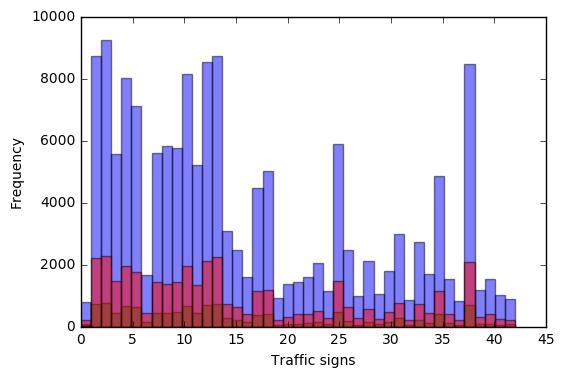

In [14]:
plt.hist(y_train,n_classes,alpha=0.5)
plt.hist(y_test,n_classes,alpha=0.5)
plt.hist(y_validation,n_classes,alpha=0.5)

plt.xlabel("Traffic signs")
plt.ylabel("Frequency")
plt.show()  

In [15]:
with tf.Session() as sess:
    writer = tf.summary.FileWriter("./logs/traffc_logs",sess.graph)
    merged = tf.summary.merge_all()

In [16]:



#Train the session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    print("Training...")
    print()
    
    for i in range(EPOCH):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            #batch_x = sess.run(tf.image.rgb_to_grayscale(batch_x,name=None))
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet-traffic')
    print("Model saved")



Training...

EPOCH 1 ...
Validation Accuracy = 0.934

EPOCH 2 ...
Validation Accuracy = 0.961

EPOCH 3 ...
Validation Accuracy = 0.979

EPOCH 4 ...
Validation Accuracy = 0.976

EPOCH 5 ...
Validation Accuracy = 0.988

EPOCH 6 ...
Validation Accuracy = 0.988

EPOCH 7 ...
Validation Accuracy = 0.985

EPOCH 8 ...
Validation Accuracy = 0.985

EPOCH 9 ...
Validation Accuracy = 0.992

EPOCH 10 ...
Validation Accuracy = 0.988

Model saved


In [17]:
#Evaluate the model
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.795


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

In [18]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

Prepocessed data using the suffle from sklearn to  randomly arrange the data, such that the sequence doesn't matter in each epoch

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

In [19]:
### Define your architecture here.
### Feel free to use as many code cells as needed.


Set up the training and test data using the provided dataset,  the validation data, from the sample of  training data, using the train_test_split of  sklearn.model_selection .

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

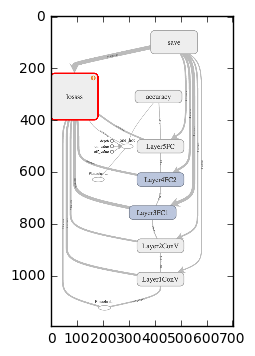

In [20]:
### Train your model here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg
arch_image = mpimg.imread('graph_architecture.png')
plt.imshow(arch_image)

Summary of architecture

 -  Input
 -  Layer1 :  Convolution network with Input = 32x32x3. Output = 28x28x6.
 -  ReLU activation layer
 -  Max pool Layer 
 -  Layer 2:  Convolution network with  Output = 10x10x16.
 -  ReLU activation layer
 -  Max pool layer
 -  Flatten
 -  Layer 3 :  Fully Connected Layer
 -  Relu Layer
 -  Layer 4 : Fully Connected Layer
 -  ReLU layer
 -  Output Layer

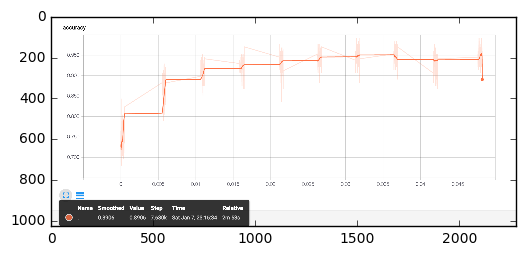

In [21]:
accr_image = mpimg.imread('accuracy.png')
plt.imshow(accr_image)

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

I used Adam Optimizerm with epoch  = 10 , batch_size = 128, and learning_rate =  0.001 . In doing so, i also captured the  summary using tf.summary to be dispayed on tensorboard.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
At first, i tried, the whole training set, with  all  traing data with gray scale images,. the trining was slow but it was providing accuracy 100%, which  was surprising,  then i reduce  the traing and  validation set, by spliting the  training set, which  increases the  training time  but decreses the accuracy, but more  acceptable as it was generalizing the data instead of memorising it.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

sg-15.png


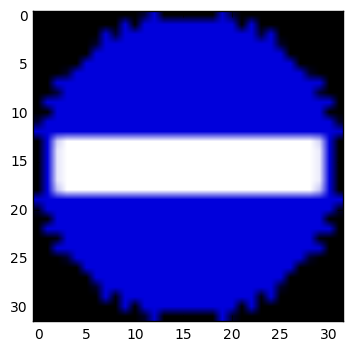

sg-17.png


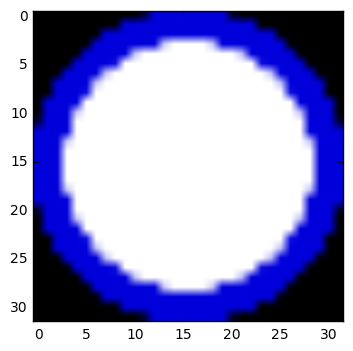

sg-22.png


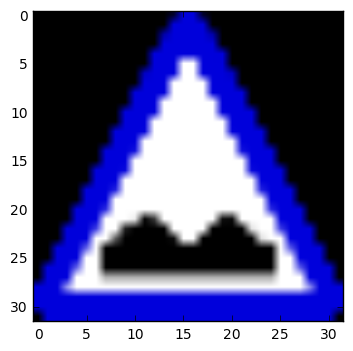

sg-24.png


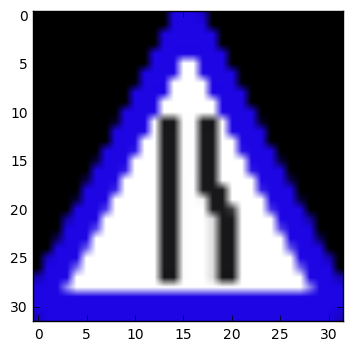

sg-28.png


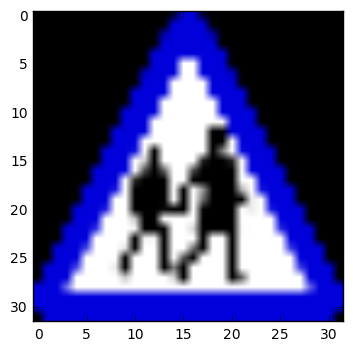

sg-34.png


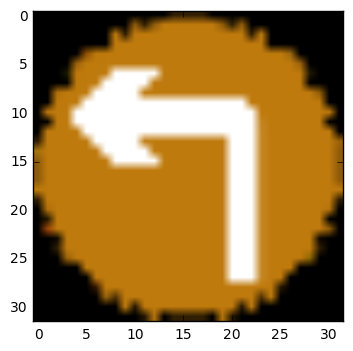

new images loaded
(32, 32, 3)


In [39]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
images = os.listdir("images/")



from numpy import loadtxt
signnames = loadtxt("signnames.csv", delimiter=",",skiprows=1,dtype=str)
newimages = np.zeros((1,32,32,3))

for img in images:
    dim = (32, 32)
    print(img)
    imgsrc = cv2.imread("images/"+img)
   # print("image is", img , " : ", imgsrc)
    image = cv2.resize(imgsrc, dim)
    newimages = np.append(newimages, [image[:,:,:]],axis=0)
    plt.imshow(image)
    plt.show()
    #print(image.shape)

print("new images loaded")
newimages = newimages[1:]
print(newimages[0].shape)
#print(newimages)


In [33]:
from sklearn.preprocessing import LabelBinarizer

# Saving labels
test_images_labels = np.array([[15] ,[17],  [22], [24],  [28], [34]])

# Turn labels into numbers and apply One-Hot Encoding
encoder = LabelBinarizer()
encoder.fit(test_images_labels)
test_images_labels = encoder.transform(test_images_labels)

# Change to float32, so it can be multiplied against the features in TensorFlow, which are float32
test_images_labels = test_images_labels.astype(np.float32)

print('Labels Encoded')

Labels Encoded


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

It would be difficult to find classification for the image as, it shows school going kids, which could be represented differently at different places
Also, there are a couple of qualities that make classification difficult: 
1.  When I downloaded the image from the internet, and then resized it to 32x32, the structure of the image itself was lost, as it can be seen by images for most of the images seems distorted. 
2.  When the sign is not centered, or at an angle.
3.  When the image is centered and closer, the classifier is easier for it to work.
4.  with different background, its hard to recognise
5. it can be affected due to wether condition also.

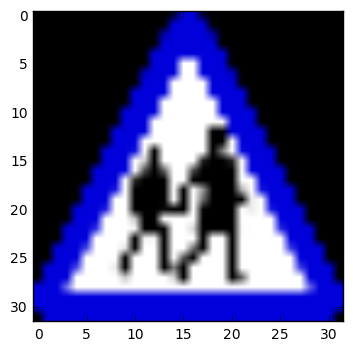

In [34]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
imgsrc = cv2.imread("images/sg-28.png")
image = cv2.resize(imgsrc, dim)
#newimages = np.append(newimages, [image[:,:,:]],axis=0)
plt.imshow(image)


It would be difficult to find classification for the image as, it  shows  school going  kids, which could be represented  differently at different places

In [41]:
batch_size=4
epoch2=6
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    #([[22] ,[28],  [17], [15],  [24], [34
    test_images_labels = np.array([22, 17, 15, 24, 28 , 34 ]) 
    prediction_accuracy = evaluate(newimages, test_images_labels)
    new_test_prediction = tf.nn.softmax(logits)
    predicted_labels = tf.argmax(new_test_prediction, 1)
    y_predict,new_test_predictionArr = sess.run([predicted_labels,new_test_prediction], feed_dict={x: newimages, y: test_images_labels})
    
    print("pridiction accuracy = {:.3f}".format(prediction_accuracy))
    print("predicted ", y_predict )
    print("actual ", test_images_labels)
    
    predicted = y_predict
    #num_examples = len(newimages)
    #total_accuracy = 0
    #22 12 25 18 35 12
    #sess = tf.get_default_session()
    #for offset in range(0, num_examples, batch_size):
    #    batch_x, batch_yy = newimages[offset:offset+batch_size], test_images_labels[offset:offset+batch_size]
    #    #print("x is", batch_x[0].shape, batch_yy)
    #    batch_yy = batch_yy.transpose()[0]

    #    accuracy,y_predict = sess.run([accuracy_operation,logits], feed_dict={x: batch_x, y: batch_yy})
    #    print("Test Accuracy = {:.3f}".format(accuracy))

pridiction accuracy = 0.167
predicted  [22 12 25 18 35 12]
actual  [22 17 15 24 28 34]


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

Nope,The accuracey was 16.7%,  were able to predict 1 correct out of 6 images.

predicted  [22 12 25 18 35 12]
actual  [22 17 15 24 28 34]

The model performed poorely on Singapore traffic sign data. It performed well on signs that look like the signs in Germany (like stop, do not enter, etc). However, for signs that are significantly different from those seen in the training data set, generalization is poor.

From the prediction I did to the candidate image, the testing accuracy is 16.7%, however, the model prediction accuracy on the training set was 98%.
As a result, I believe my model did not perform well in the real world situation, possible reason would be, it need more generalization with different set of traffic data around the world.


Label 22 predicted:  22


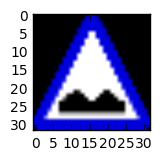

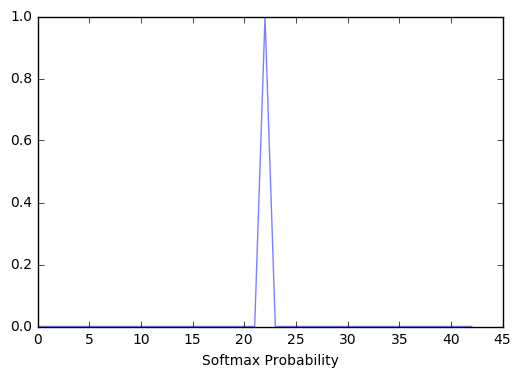

Label 17 predicted:  12


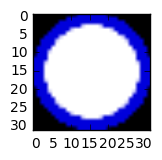

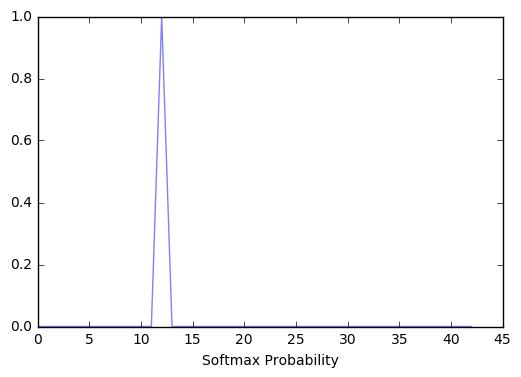

Label 15 predicted:  25


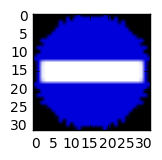

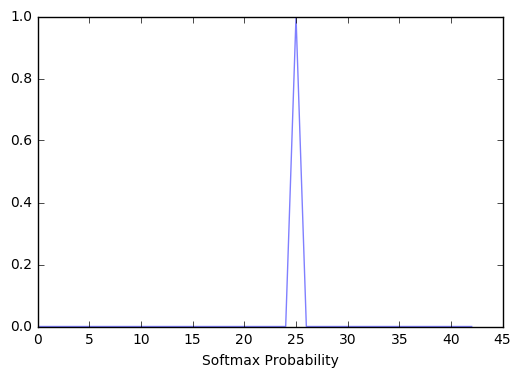

Label 24 predicted:  18


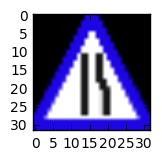

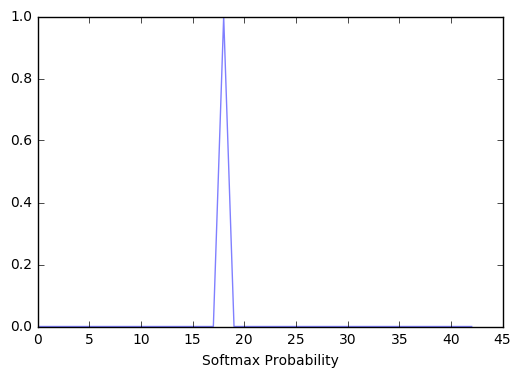

Label 28 predicted:  35


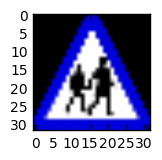

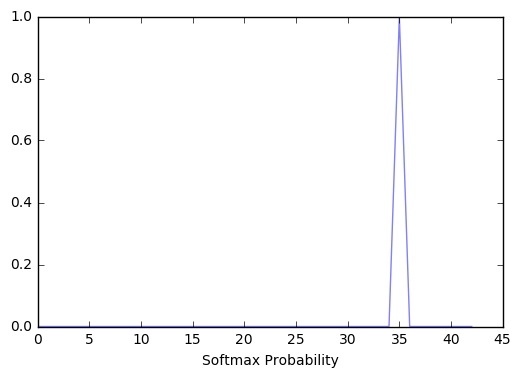

Label 34 predicted:  12


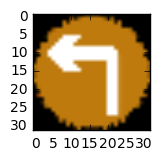

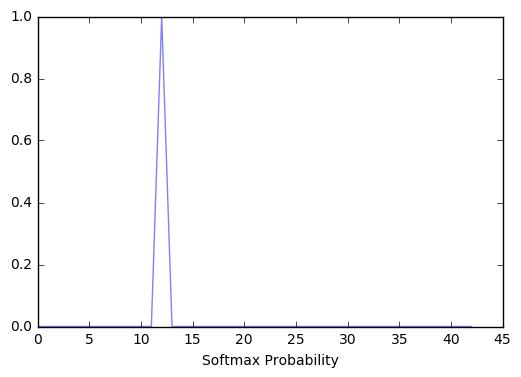

In [53]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
y_range=range(42)
for i,item in enumerate(new_test_predictionArr):
    xxx = test_images_labels[i]
    print("Label",xxx, "predicted: ",predicted[i] )
    labelx = ''.join(['images/sg-' , str(xxx) , '.png'])
    imgsrc = cv2.imread(labelx)
    image = cv2.resize(imgsrc, dim)
    #newimages = np.append(newimages, [image[:,:,:]],axis=0)
    plt.figure(figsize = (5,1.5))
    plt.imshow(image)
    plt.show()
    plt.plot(item, alpha=0.5)
    plt.xlabel('Softmax Probability')
    plt.figure(figsize = (5,1.5))
    plt.show()
    

    #plt.hist(new_test_predictionArr[i],test_images_labels[i],alpha=0.5)
#plt.bar(predicted,test_images_labels)

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

The model do not recognize for new images, only 1 out of 6 was correct

The model is most certain of signs that are similar to signs in the training set (i.e. similar in Germany). The model is very inaccurate for signs that are not similar to the signs in Germany.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.